In [1]:
from pprint import pprint

import altair
import pandas as pd

from libs import AdaptativeConformalClassifier, ConformalClassifier, LGBMultiClassifier
from libs.metrics import ConformalMetrics
from libs.utils import create_upset_plot, train_calib_valid_split

altair.renderers.enable("svg")

label = "Churn Category"
drop = ["City", "Zip Code", "Latitude", "Longitude", "Customer Status", "Churn Reason"]

df = pd.read_csv("data/telecom_customer_churn.csv", index_col="Customer ID")
df = df.drop(drop, axis=1)
df[label] = (
    df[label]
    .fillna("Stayed")
    .replace(["Attitude", "Dissatisfaction", "Price"], "Other")
)
object_cols = df.select_dtypes("object").columns
df[object_cols] = df[object_cols].astype("category")


train, calib, valid = train_calib_valid_split(df)

{'calibration_metrics': {'calibration_error': 0.004874585896829098,
                         'calibration_score': 0.19214102953398363,
                         'class_calibration_errors': {'Competitor': -0.22365145228215766,
                                                      'Other': -0.2471337579617835,
                                                      'Stayed': 0.09101412066752246},
                         'max_calibration_error': 0.2471337579617835},
 'coverage_metrics': {'average_class_conditional_coverage': 0.7734096368078603,
                      'class_conditional_coverage': {'Competitor': 0.6763485477178424,
                                                     'Other': 0.6528662420382165,
                                                     'Stayed': 0.9910141206675225},
                      'coverage_deviation': 0.004874585896829098,
                      'marginal_coverage': 0.9048745858968291,
                      'worst_class_coverage': 0.6528662420382165},
 'eff

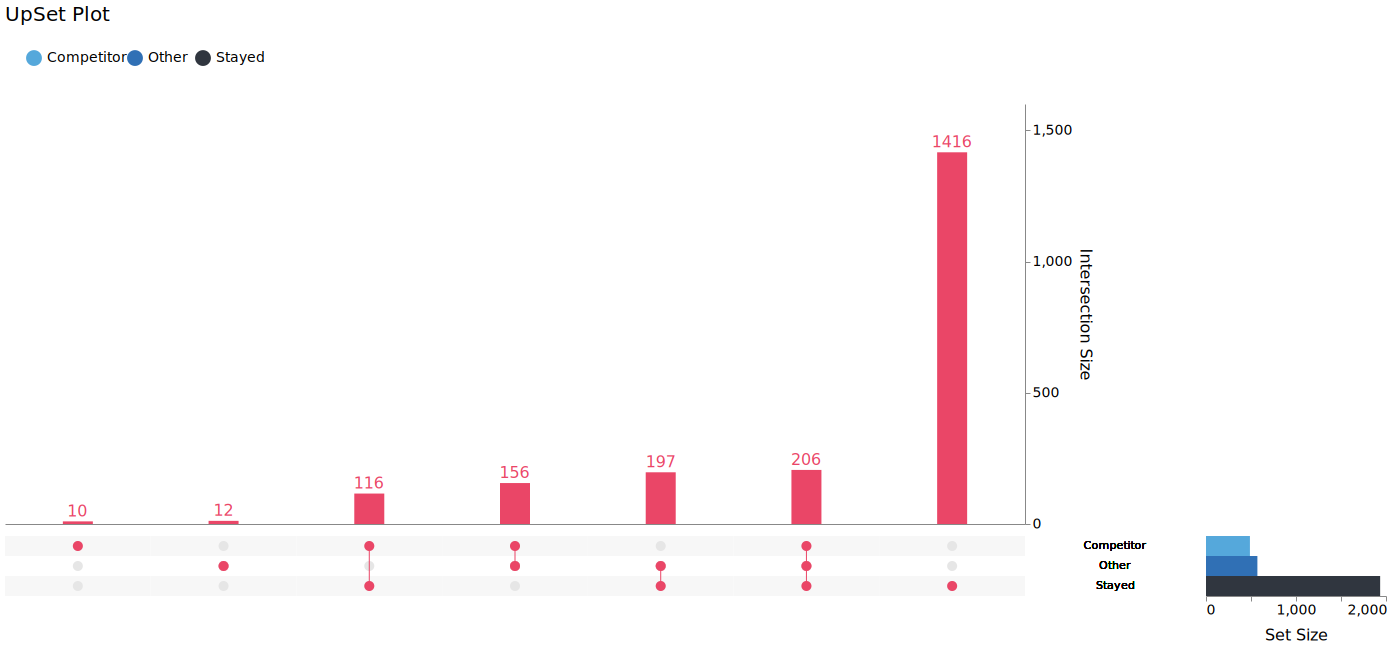

In [2]:
model = LGBMultiClassifier(log_eval_period=0)
conformal_model = ConformalClassifier(model)
conformal_model.train(train, calib, valid, label).calibrate(calib)
preds = conformal_model.predict(valid)

cm = ConformalMetrics(preds, true_column="Actuals")
pprint(cm.summarize_metrics())

create_upset_plot(preds.drop("Actuals", axis=1))

{'calibration_metrics': {'calibration_error': -0.00553715097018459,
                         'calibration_score': 0.17505203933289545,
                         'class_calibration_errors': {'Competitor': -0.2692946058091287,
                                                      'Other': -0.17070063694267523,
                                                      'Stayed': 0.06854942233632866},
                         'max_calibration_error': 0.2692946058091287},
 'coverage_metrics': {'average_class_conditional_coverage': 0.7761847265281748,
                      'class_conditional_coverage': {'Competitor': 0.6307053941908713,
                                                     'Other': 0.7292993630573248,
                                                     'Stayed': 0.9685494223363287},
                      'coverage_deviation': 0.00553715097018459,
                      'marginal_coverage': 0.8944628490298154,
                      'worst_class_coverage': 0.6307053941908713},
 'effi

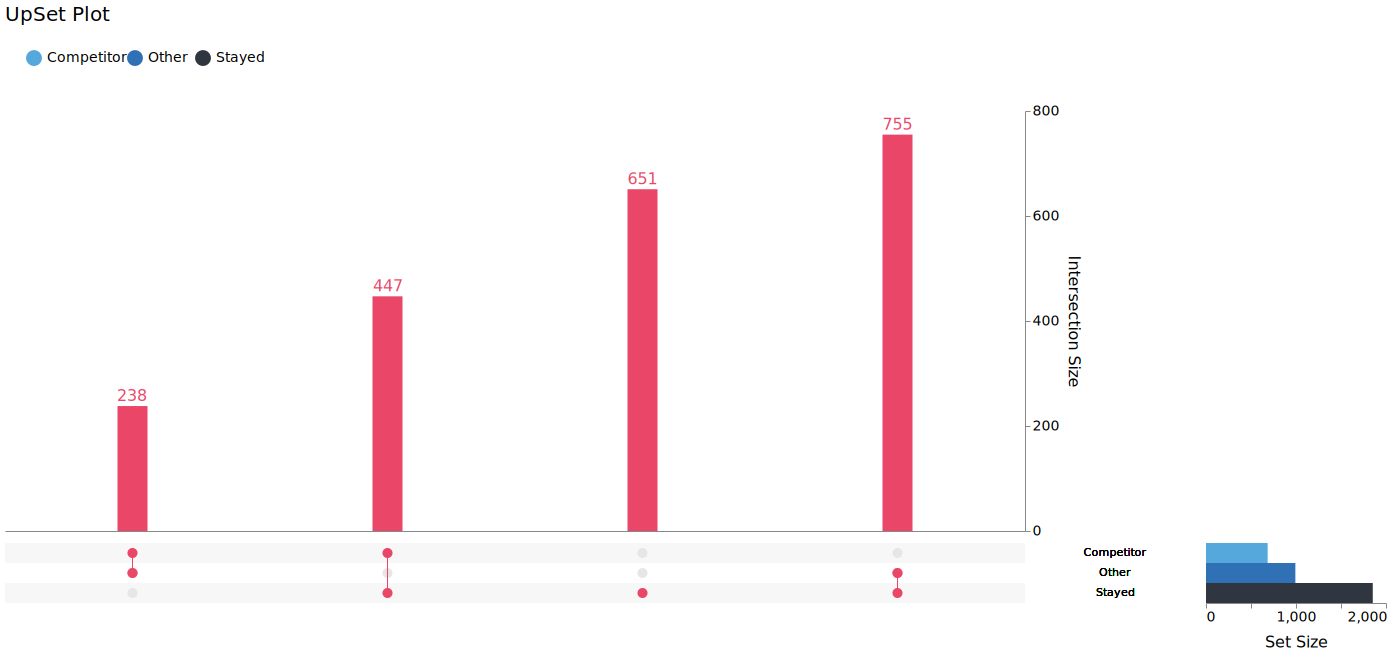

In [3]:
model = LGBMultiClassifier(log_eval_period=0)
conformal_model = AdaptativeConformalClassifier(model)
conformal_model.train(train, calib, valid, label).calibrate(calib)
preds = conformal_model.predict(valid)

cm = ConformalMetrics(preds, true_column="Actuals")
pprint(cm.summarize_metrics())

create_upset_plot(preds.drop("Actuals", axis=1))